# HSMA Exercise

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.  There are lots of features, and a description of the features can be found in the file stroke_data_feature_descriptions.csv.

Train a Neural Network model to try to predict whether or not a stroke patient receives clot-busting treatment.  Use the prompts below to write each section of code.

How accurate can you get your model on the test set?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# sklearn for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# TensorFlow sequential model
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Download data 
# (not required if running locally and have previously downloaded data)

download_required = True

if download_required:
    
    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'        
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)

Look at an overview of the data using the `describe()` method of Pandas.

In [3]:
data.describe()

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,...,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,0.403330,0.159506,0.142320,0.154672,0.165414,0.055854,0.113319,0.208915,0.515575,74.553706,...,1.114930,1.002148,0.963480,0.963480,0.910849,0.216971,0.610097,0.944146,0.739527,0.566595
std,0.490698,0.366246,0.349472,0.361689,0.371653,0.229701,0.317068,0.406643,0.499892,12.280576,...,0.930527,1.479211,1.441594,1.406501,1.380606,0.522643,0.771932,1.121379,0.731083,0.794000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,83.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000


Convert all of the data in the dataframe to type `float`, pull out the X (feature) and y (label) data, and put X and y into Numpy arrays.

In [4]:
data = data.astype(float)

X = data.drop('Clotbuster given', axis=1)
y = data['Clotbuster given']

X_np = X.values
y_np = y.values

Define a function that will MinMax Normalise training and test feature data passed into it.

In [5]:
def scale_data(X_train, X_test):
    """Scale data 0-1 based on min and max in training set"""
    
    # Initialise a new scaling object for normalising input data
    sc = MinMaxScaler()

    # Apply the scaler to the training and test sets
    train_sc = sc.fit_transform(X_train)
    test_sc = sc.fit_transform(X_test)
    
    return train_sc, test_sc

Define a function that will build a sequential neural network, given a number of features, a number of hidden layers (with a default of 5), a number of neurons per hidden layer (with a default of 64), a dropout rate (with a default of 0), and a learning rate (with a default of 0.003).  The function should also create a single neuron output layer with a Sigmoid activation function, use an Adam optimiser, and a Binary Crossentropy loss function, with accuracy as the performance metric.

In [6]:
def make_net(number_features, 
             hidden_layers=5, 
             hidden_layer_neurones=64, 
             dropout=0.0, 
             learning_rate=0.003):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()

    # Add hidden hidden_layers using a loop
    for i in range(hidden_layers):
        # Add fully connected layer with ReLu activation
        net.add(Dense(
            hidden_layer_neurones, 
            input_dim=number_features,
            activation='relu'))
        # Add droput layer
        net.add(Dropout(dropout))
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))    
    
    # Compiling model
    opt = Adam(learning_rate=learning_rate)
    
    net.compile(loss='binary_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy'])
    
    return net

Split your data into training and test sets.  Decide on an appropriate test data size.  Then scale the feature data using MinMax Normalisation.

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size = 0.25, random_state=42)

# Scale X data
X_train_sc, X_test_sc = scale_data(X_train, X_test)

Write a function to calculate accuracy of the model on both training and test sets.

In [8]:
def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of training and test data fits"""    
    
    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)

    # Show acuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')

Write a function to plot training and test set accuracy over time during model fitting.

In [9]:
def plot_training(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    fig, ax = plt.subplots()

    ax.set_xlabel('Time')
    ax.set_ylabel('Accuracy')

    ax.plot(epochs, acc_values, color='blue', label='Training acc')
    ax.plot(epochs, val_acc_values, color='red', label='Test accuracy')
    ax.set_title('Training and validation accuracy')
    
    ax.legend()

    fig.show()

Create a neural network with a number of hidden layers, neurons, dropout rate and learning rate of your choosing.  Run the model for a number of epochs and with a batch size of your choosing (be careful about using large batch sizes unless you've got a CUDA-enabled GPU and TensorFlow is set up to use it).

In [10]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_sc, y_test),
                    verbose=1)


Epoch 1/100


c:\Users\dan\anaconda3\envs\tf_hsma\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6053 - loss: 0.6310 - val_accuracy: 0.7232 - val_loss: 0.5111
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7871 - loss: 0.4625 - val_accuracy: 0.7682 - val_loss: 0.4507
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8193 - loss: 0.4136 - val_accuracy: 0.8176 - val_loss: 0.4210
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8137 - loss: 0.3941 - val_accuracy: 0.8112 - val_loss: 0.3919
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8437 - loss: 0.3576 - val_accuracy: 0.8133 - val_loss: 0.4186
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8605 - loss: 0.3330 - val_accuracy: 0.7983 - val_loss: 0.4143
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.8259 - loss: 0.3623 - val_accuracy: 0.8326 - val_loss: 0.3939
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8528 - loss: 0.3238 - val_accuracy: 0.8326 - val_los

Calculate training and test set accuracy of your model.

In [11]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
Training accuracy 1.000
Test accuracy 0.773


Plot training and test set accuracy over time during fitting.

C:\Users\dan\AppData\Local\Temp\ipykernel_31272\832266572.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


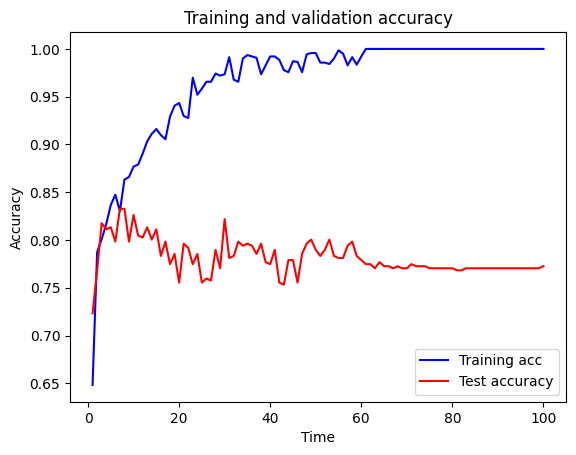

In [12]:
history_dict = history.history
history_dict.keys()

plot_training(history.history)

Save this baseline version of your model, so you can access it again later if you need it.

In [13]:
# Save model
model.save('baseline_stroke_dan.keras')

Now try different things in your model to improve test accuracy.  You might consider :
- Reducing overfitting if overfitting is a problem.
- Changing the number of hidden layers
- Changing the number of hidden neurons
- Changing batch size
- Changing dropout rate
- Changing the learning rate
- Changing the train / test split
- Trying stratified k-fold validation
- Dropping features

or more!

Tip : keep your analysis above as your base case.  Then below, just use the functions you've built to rebuild and retrain models with different parameters (or run altered versions of other cells below).  Don't forget, you need to build and train again before you get new outputs.

Add comments to your code to explain what you've changed, and change things a bit at a time (don't change everything all at once!)

In [14]:
"""Add EarlyStopping with 10 epoch patience, and restore best weights"""

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_sc, y_test),
                    verbose=1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6107 - loss: 0.6270 - val_accuracy: 0.8155 - val_loss: 0.4071
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7961 - loss: 0.4391 - val_accuracy: 0.8133 - val_loss: 0.3966
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4099 - val_accuracy: 0.8219 - val_loss: 0.3931
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8115 - loss: 0.4034 - val_accuracy: 0.7790 - val_loss: 0.5224
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.4493 - val_accuracy: 0.8240 - val_loss: 0.3890
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3663 - val_accuracy: 0.8197 - val_loss: 0.3900
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.3349 - val_accuracy: 0.8112 - val_loss: 0.4120
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8278 - loss: 0.3703 - val_accuracy: 0.8112 - v

In [15]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
Training accuracy 0.835
Test accuracy 0.824


C:\Users\dan\AppData\Local\Temp\ipykernel_31272\832266572.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


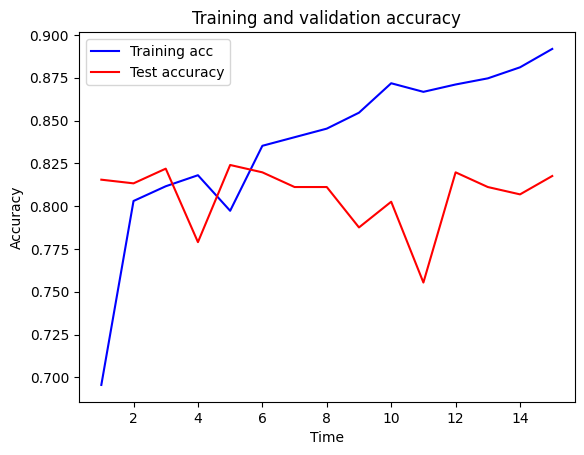

In [16]:
plot_training(history.history)

In [17]:
"""Keep EarlyStopping with 10 epoch patience, and restore best weights.
Reduce number of hidden layers to 3 (from 5)
"""

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features, hidden_layers=3)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_sc, y_test),
                    verbose=1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6508 - loss: 0.6134 - val_accuracy: 0.8004 - val_loss: 0.4267
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.4342 - val_accuracy: 0.8197 - val_loss: 0.3939
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8147 - loss: 0.4055 - val_accuracy: 0.8112 - val_loss: 0.3909
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8235 - loss: 0.3869 - val_accuracy: 0.8369 - val_loss: 0.3855
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8459 - loss: 0.3681 - val_accuracy: 0.8391 - val_loss: 0.3859
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8339 - loss: 0.3546 - val_accuracy: 0.8369 - val_loss: 0.3840
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3348 - val_accuracy: 0.8197 - val_loss: 0.4127
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8794 - loss: 0.3000 - val_accuracy: 0.8047 -

In [18]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
Training accuracy 0.866
Test accuracy 0.837


C:\Users\dan\AppData\Local\Temp\ipykernel_31272\832266572.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


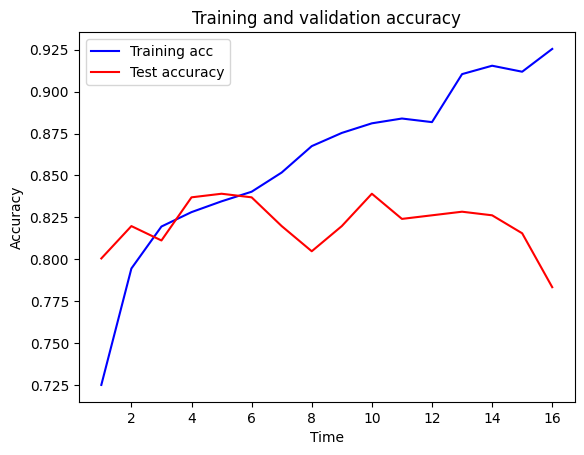

In [19]:
plot_training(history.history)

In [20]:
"""Keep EarlyStopping and 3 hidden layers.
Add dropout with rate of 0.5
"""

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features, hidden_layers=3, dropout=0.5)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_sc, y_test),
                    verbose=1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5520 - loss: 0.6732 - val_accuracy: 0.7339 - val_loss: 0.5768
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6873 - loss: 0.5617 - val_accuracy: 0.8283 - val_loss: 0.4466
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7454 - loss: 0.5279 - val_accuracy: 0.8176 - val_loss: 0.4190
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7650 - loss: 0.5017 - val_accuracy: 0.8348 - val_loss: 0.4051
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7930 - loss: 0.4507 - val_accuracy: 0.8262 - val_loss: 0.4038
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7885 - loss: 0.4564 - val_accuracy: 0.8155 - val_loss: 0.3887
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7976 - loss: 0.4555 - val_accuracy: 0.8219 - val_loss: 0.3939
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.4141 - val_accuracy: 0.8262 - v

In [21]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
Training accuracy 0.837
Test accuracy 0.822


In [22]:
"""Keep EarlyStopping, 3 hidden layers and 0.5 dropout.
Change to 32 hidden layer neurons (from 64)
"""

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features, hidden_layers=3, dropout=0.5,
                 hidden_layer_neurones=32)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_sc, y_test),
                    verbose=1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5521 - loss: 0.7286 - val_accuracy: 0.6030 - val_loss: 0.6366
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5799 - loss: 0.6559 - val_accuracy: 0.6931 - val_loss: 0.5837
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6458 - loss: 0.6387 - val_accuracy: 0.7489 - val_loss: 0.5316
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6782 - loss: 0.5821 - val_accuracy: 0.8090 - val_loss: 0.4784
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7050 - loss: 0.5606 - val_accuracy: 0.7983 - val_loss: 0.4451
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7499 - loss: 0.5106 - val_accuracy: 0.8197 - val_loss: 0.4301
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7868 - loss: 0.4857 - val_accuracy: 0.8112 - val_loss: 0.4158
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7849 - loss: 0.4531 - val_accuracy: 0.8412 - v

In [23]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
Training accuracy 0.832
Test accuracy 0.848


In the following cells, I walk through an example of dropping one of the features (whether the patient has diabetes) from the data as an example of how you would do this.  In practice, you should do this following some analysis via Explainable AI methods, such as the use of Shapley values, which you will learn about in session 4G.

In [24]:
# We cut from X, which already has the label ("Clotbuster given") dropped
# We can use the same y as before
X_cut = X.drop('Diabetes', axis=1)

X_np_cut = X_cut.values

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_np_cut, y_np, test_size = 0.25, random_state=42)

# Scale X data
X_train_sc, X_test_sc = scale_data(X_train, X_test)

In [26]:
"""Keep EarlyStopping, 3 hidden layers, 0.5 dropout, and 32 hidden layer
neurons.
Dropped 'diabetes' feature from data.
"""

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.keras', save_best_only=True)

# Define early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features, hidden_layers=3, dropout=0.5,
                 hidden_layer_neurones=32)

### Train model (and store training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_sc, y_test),
                    verbose=1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


c:\Users\dan\anaconda3\envs\tf_hsma\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5255 - loss: 0.7121 - val_accuracy: 0.6009 - val_loss: 0.6663
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.6685 - val_accuracy: 0.6137 - val_loss: 0.6449
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6093 - loss: 0.6471 - val_accuracy: 0.6931 - val_loss: 0.5566
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - loss: 0.5886 - val_accuracy: 0.7854 - val_loss: 0.4961
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6935 - loss: 0.5392 - val_accuracy: 0.8026 - val_loss: 0.4620
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7225 - loss: 0.5247 - val_accuracy: 0.7918 - val_loss: 0.4429
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 0.4968 - val_accuracy: 0.8112 - val_loss: 0.4242
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7832 - loss: 0.5054 - val_accuracy: 0.8112 - val_loss: 0.4

In [27]:
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
Training accuracy 0.847
Test accuracy 0.835


In the above example, dropping the 'diabetes' feature led to a more inaccurate model on the test set.